In [1]:
library(Signac)
library(Seurat)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
library(Matrix)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

载入需要的程辑包：SeuratObject

载入需要的程辑包：sp


载入程辑包：‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

载入需要的程辑包：ensembldb

载入需要的程辑包：BiocGenerics


载入程辑包：‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The f

In [2]:
root_dir = '.'
pbmc_scrna_data_dir = file.path(root_dir, 'pbmc8k_filtered_gene_bc_matrices', 'filtered_gene_bc_matrices', 'GRCh38')
pbmc_atac_data_dir = file.path(root_dir, 'atac_v1_pbmc_10k_filtered_peak_bc_matrix','filtered_peak_bc_matrix')
atac_fragment_path = file.path(root_dir, "atac_v1_pbmc_10k_fragments.tsv.gz")

In [3]:
pbmc_scrna_data <- ReadMtx(mtx=file.path(pbmc_scrna_data_dir,'matrix.mtx'), 
                          cells=file.path(pbmc_scrna_data_dir, 'barcodes.tsv'),
                          features=file.path(pbmc_scrna_data_dir, 'genes.tsv'))
pbmc_scrna_metadata <- read.table("pbmc_scrna_metadata.tsv", sep=',')

In [4]:
pbmc_scrna_obj <- CreateSeuratObject(counts = pbmc_scrna_data, project = "pbmc8k", assay="RNA", meta.data=pbmc_scrna_metadata,
                                    min.cells = 3, min.features = 200)
pbmc_scrna_obj[["percent.mt"]] <- PercentageFeatureSet(pbmc_scrna_obj, pattern = "^MT-")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


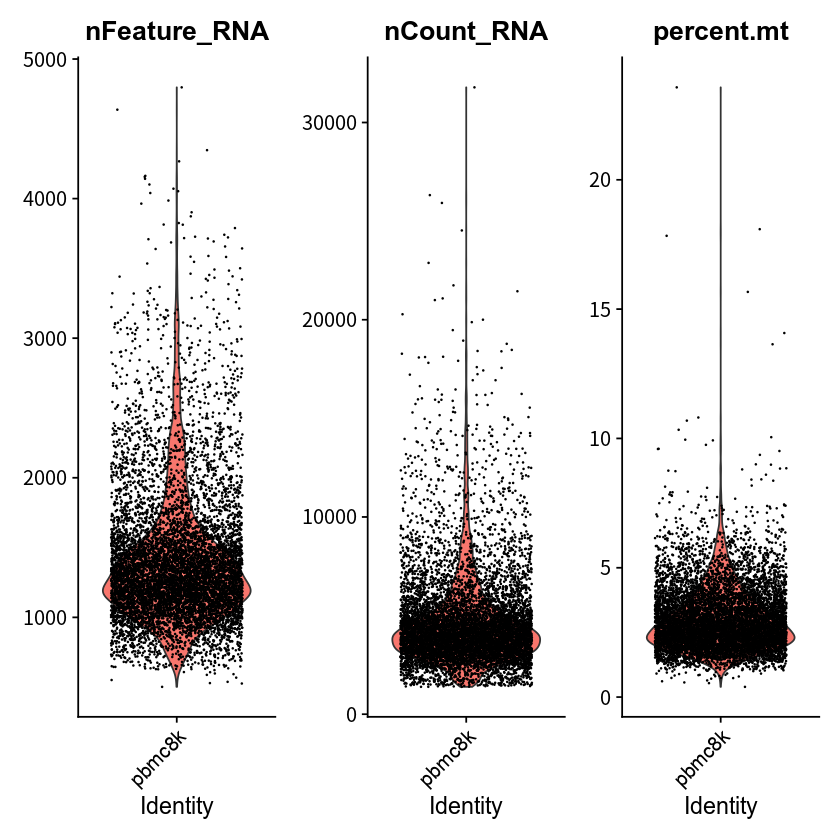

In [5]:
VlnPlot(pbmc_scrna_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [6]:
pbmc_scrna_obj <- subset(pbmc_scrna_obj, subset = nFeature_RNA > 200 & nFeature_RNA < 3000 & percent.mt < 8)
# pbmc_scrna_obj <- NormalizeData(pbmc_scrna_obj)

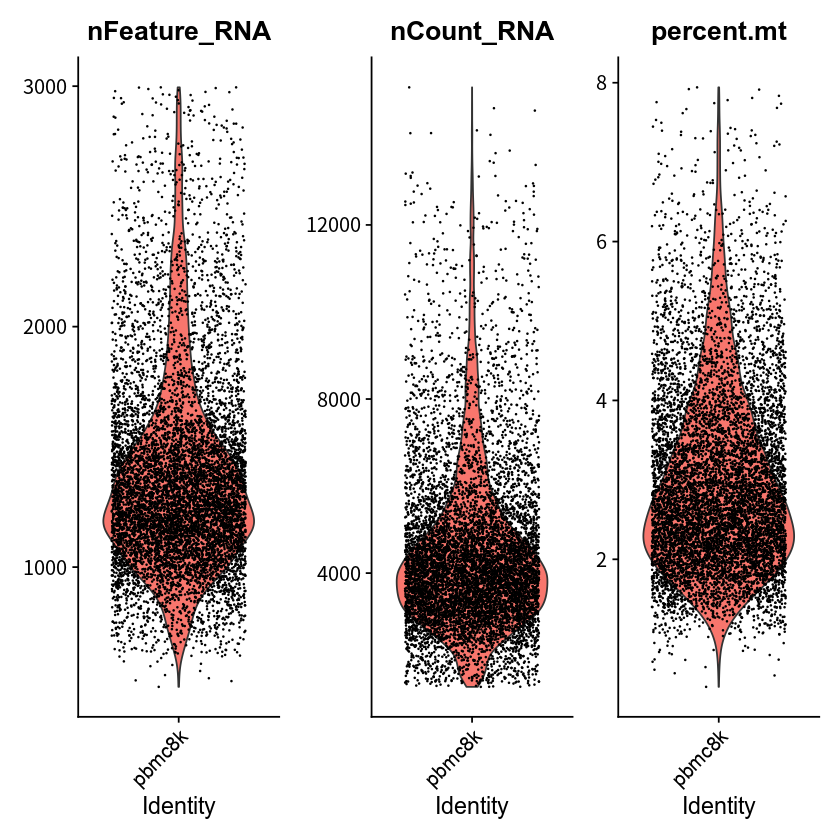

In [8]:
VlnPlot(pbmc_scrna_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [7]:
pbmc_scrna_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2,predicted.celltype.l3.score,predicted.celltype.l3,mapping.score
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
AAACCTGAGCATCATC-1,pbmc8k,2394,871,3.842941,1.0000000,B,0.9745617,B naive,0.8970794,B naive lambda,0.9736251
AAACCTGAGCTAACTC-1,pbmc8k,1694,806,5.726092,1.0000000,Mono,1.0000000,CD14 Mono,1.0000000,CD14 Mono,0.8726523
AAACCTGAGCTAGTGG-1,pbmc8k,4520,1316,1.946903,0.9593725,CD4 T,0.9161338,CD4 TCM,0.7403334,CD4 TCM_3,0.6008800
AAACCTGCACATTAGC-1,pbmc8k,2788,898,1.398852,0.9408795,CD4 T,0.3975001,CD4 TCM,0.3975001,CD4 TCM_1,0.6433882
AAACCTGCACTGTTAG-1,pbmc8k,4667,1526,3.621170,1.0000000,Mono,0.9878810,CD14 Mono,0.9878810,CD14 Mono,0.9553917
AAACCTGCATAGTAAG-1,pbmc8k,4440,1495,3.806306,1.0000000,Mono,1.0000000,CD14 Mono,1.0000000,CD14 Mono,0.9712663
AAACCTGCATGAACCT-1,pbmc8k,3224,1253,3.722084,0.9711397,CD8 T,0.9198527,CD8 TEM,0.6242065,CD8 TEM_2,0.8873818
AAACCTGGTAAGAGGA-1,pbmc8k,5205,1433,3.073967,0.6089558,CD8 T,0.5832899,CD8 TCM,0.4276640,CD8 TCM_2,0.5699128
AAACCTGGTAGAAGGA-1,pbmc8k,5493,1632,4.059712,1.0000000,Mono,0.9360948,CD14 Mono,0.9360948,CD14 Mono,0.9774402


In [9]:
print(unique(pbmc_scrna_obj@meta.data$predicted.celltype.l1))

[1] "B"       "Mono"    "CD4 T"   "CD8 T"   "other T" "DC"      "NK"     
[8] "other"  


In [10]:
print(unique(pbmc_scrna_obj@meta.data$predicted.celltype.l2))

 [1] "B naive"           "CD14 Mono"         "CD4 TCM"          
 [4] "CD8 TEM"           "CD8 TCM"           "CD8 Naive"        
 [7] "B intermediate"    "gdT"               "cDC2"             
[10] "CD16 Mono"         "NK"                "B memory"         
[13] "CD4 Naive"         "Treg"              "dnT"              
[16] "Plasmablast"       "MAIT"              "CD4 TEM"          
[19] "Platelet"          "pDC"               "HSPC"             
[22] "NK_CD56bright"     "CD4 Proliferating" "ILC"              
[25] "NK Proliferating"  "ASDC"              "cDC1"             
[28] "CD8 Proliferating"


In [11]:
print(unique(pbmc_scrna_obj@meta.data$predicted.celltype.l3))

 [1] "B naive lambda"        "CD14 Mono"             "CD4 TCM_3"            
 [4] "CD4 TCM_1"             "CD8 TEM_2"             "CD8 TCM_2"            
 [7] "CD8 Naive"             "B intermediate kappa"  "gdT_1"                
[10] "cDC2_1"                "CD16 Mono"             "NK_1"                 
[13] "B memory lambda"       "CD4 Naive"             "gdT_3"                
[16] "NK_4"                  "Treg Memory"           "CD4 TCM_2"            
[19] "CD8 TEM_6"             "CD8 TCM_1"             "B naive kappa"        
[22] "NK_2"                  "CD8 TEM_1"             "cDC2_2"               
[25] "gdT_2"                 "dnT_2"                 "dnT_1"                
[28] "Plasma"                "MAIT"                  "B intermediate lambda"
[31] "CD8 TEM_3"             "CD4 TEM_2"             "Platelet"             
[34] "B memory kappa"        "pDC"                   "CD8 TEM_5"            
[37] "HSPC"                  "Treg Naive"            "CD4 TEM_1"            

In [12]:
cell_types = unique(pbmc_scrna_obj@meta.data$predicted.celltype.l2)
summary(as.factor(pbmc_scrna_obj@meta.data$predicted.celltype.l2))

ASDC    B intermediate          B memory           B naive 
                2               298               104               817 
        CD14 Mono         CD16 Mono         CD4 Naive CD4 Proliferating 
             1857               204               362                 1 
          CD4 TCM           CD4 TEM         CD8 Naive CD8 Proliferating 
             1975                39               631                 1 
          CD8 TCM           CD8 TEM              cDC1              cDC2 
              192               629                 2               102 
              dnT               gdT              HSPC               ILC 
               37               324                12                 8 
             MAIT                NK  NK Proliferating     NK_CD56bright 
              141               265                 6                38 
              pDC       Plasmablast          Platelet              Treg 
               63                 1                12               100

* CD14 Mono: 1880
* CD4 TCM: 1980
* CD8 Naive: 631
* B naive: 819
* CD8 TEM: 633
* NK: 266

## 筛选peak

In [13]:
save_dir = file.path("pbmc_sep_data")

### CD14 Mono

In [107]:
tgt_type = "CD14 Mono"
sub_data = subset(pbmc_scrna_obj, predicted.celltype.l2==tgt_type)
gene_count = apply(sub_data@assays$RNA@counts, 1, sum)
gene_name = names(subset(gene_count, gene_count>0))
sub_data = subset(sub_data, feature=gene_name)
sub_data = FindVariableFeatures(sub_data)
sp_data = Matrix(sub_data@assays$RNA@counts, sparse = TRUE)
sub_data

Warning message:
"The following arguments are not used: nselect"


An object of class Seurat 
16529 features across 1857 samples within 1 assay 
Active assay: RNA (16529 features, 2000 variable features)
 2 layers present: counts, data

In [108]:
tgt_dir = file.path(save_dir, tgt_type, 'scrna')
if (!file.exists(tgt_dir)){
    dir.create(tgt_dir, recursive = TRUE)
}
write(x=sp_data@Dimnames[[1]], file=file.path(tgt_dir, "genes.tsv"))
write(x=sp_data@Dimnames[[2]], file=file.path(tgt_dir, "barcodes.tsv"))
write(x=sub_data@assays$RNA@var.features, file=file.path(tgt_dir, "var_features.tsv"))
writeMM(obj=sp_data, file=file.path(tgt_dir, "matrix.mtx"))

NULL

In [109]:
cd14_sub_data = sub_data
sub_data

An object of class Seurat 
16529 features across 1857 samples within 1 assay 
Active assay: RNA (16529 features, 2000 variable features)
 2 layers present: counts, data

### CD4 TCM

In [110]:
tgt_type = "CD4 TCM"
sub_data = subset(pbmc_scrna_obj, predicted.celltype.l2==tgt_type)
gene_count = apply(sub_data@assays$RNA@counts, 1, sum)
gene_name = names(subset(gene_count, gene_count>0))
sub_data = subset(sub_data, feature=gene_name)
sub_data = FindVariableFeatures(sub_data)
sp_data = Matrix(sub_data@assays$RNA@counts, sparse = TRUE)
sub_data

Warning message:
"The following arguments are not used: nselect"


An object of class Seurat 
16751 features across 1975 samples within 1 assay 
Active assay: RNA (16751 features, 2000 variable features)
 2 layers present: counts, data

In [111]:
tgt_dir = file.path(save_dir, tgt_type, 'scrna')
if (!file.exists(tgt_dir)){
    dir.create(tgt_dir, recursive = TRUE)
}
write(x=sp_data@Dimnames[[1]], file=file.path(tgt_dir, "genes.tsv"))
write(x=sp_data@Dimnames[[2]], file=file.path(tgt_dir, "barcodes.tsv"))
write(x=sub_data@assays$RNA@var.features, file=file.path(tgt_dir, "var_features.tsv"))
writeMM(obj=sp_data, file=file.path(tgt_dir, "matrix.mtx"))

NULL

In [112]:
cd4_sub_data = sub_data
sub_data

An object of class Seurat 
16751 features across 1975 samples within 1 assay 
Active assay: RNA (16751 features, 2000 variable features)
 2 layers present: counts, data

### CD8 Naive

In [113]:
tgt_type = "CD8 Naive"
sub_data = subset(pbmc_scrna_obj, predicted.celltype.l2==tgt_type)
gene_count = apply(sub_data@assays$RNA@counts, 1, sum)
gene_name = names(subset(gene_count, gene_count>0))
sub_data = subset(sub_data, feature=gene_name)
sub_data = FindVariableFeatures(sub_data)
sp_data = Matrix(sub_data@assays$RNA@counts, sparse = TRUE)
sub_data

Warning message:
"The following arguments are not used: nselect"


An object of class Seurat 
14706 features across 631 samples within 1 assay 
Active assay: RNA (14706 features, 2000 variable features)
 2 layers present: counts, data

In [114]:
tgt_dir = file.path(save_dir, tgt_type, 'scrna')
if (!file.exists(tgt_dir)){
    dir.create(tgt_dir, recursive = TRUE)
}
write(x=sp_data@Dimnames[[1]], file=file.path(tgt_dir, "genes.tsv"))
write(x=sp_data@Dimnames[[2]], file=file.path(tgt_dir, "barcodes.tsv"))
write(x=sub_data@assays$RNA@var.features, file=file.path(tgt_dir, "var_features.tsv"))
writeMM(obj=sp_data, file=file.path(tgt_dir, "matrix.mtx"))

NULL

In [115]:
cd8n_sub_data = sub_data
sub_data

An object of class Seurat 
14706 features across 631 samples within 1 assay 
Active assay: RNA (14706 features, 2000 variable features)
 2 layers present: counts, data

### B naive

In [116]:
tgt_type = "B naive"
sub_data = subset(pbmc_scrna_obj, predicted.celltype.l2==tgt_type)
gene_count = apply(sub_data@assays$RNA@counts, 1, sum)
gene_name = names(subset(gene_count, gene_count>0))
sub_data = subset(sub_data, feature=gene_name)
sub_data = FindVariableFeatures(sub_data)
sp_data = Matrix(sub_data@assays$RNA@counts, sparse = TRUE)
sub_data

Warning message:
"The following arguments are not used: nselect"


An object of class Seurat 
15029 features across 817 samples within 1 assay 
Active assay: RNA (15029 features, 2000 variable features)
 2 layers present: counts, data

In [117]:
tgt_dir = file.path(save_dir, tgt_type, 'scrna')
if (!file.exists(tgt_dir)){
    dir.create(tgt_dir, recursive = TRUE)
}
write(x=sp_data@Dimnames[[1]], file=file.path(tgt_dir, "genes.tsv"))
write(x=sp_data@Dimnames[[2]], file=file.path(tgt_dir, "barcodes.tsv"))
write(x=sub_data@assays$RNA@var.features, file=file.path(tgt_dir, "var_features.tsv"))
writeMM(obj=sp_data, file=file.path(tgt_dir, "matrix.mtx"))

NULL

In [118]:
bn_sub_data = sub_data
sub_data

An object of class Seurat 
15029 features across 817 samples within 1 assay 
Active assay: RNA (15029 features, 2000 variable features)
 2 layers present: counts, data